In [162]:
import os
import numpy as np
from tensorflow.keras.models import load_model

In [163]:
#load .h5 file of arbitrary name for testing (last if more than one)
print(os.getcwd())
for file in os.listdir(os.getcwd()):
    if file.endswith(".h5"):
        print(file)
        model=load_model(file)
model.summary()

/Users/congrendai/Desktop/King's/Pattern Recognition, Neural Networks, and Deep Learning/CW1
network_for_mnist.h5
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_251 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 conv2d_252 (Conv2D)         (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_137 (MaxPooli  (None, 12, 12, 64)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_182 (Ba  (None, 12, 12, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_253 (Conv2D)         (None, 10, 10, 128)       73856     
     

In [164]:
#determine what type of network this is
conf = model.layers[0].get_config()
inshape = conf['batch_input_shape']
if inshape[1] == 28:
    netType='CNN'
else:
    netType='MLP'

In [165]:
#test with MNIST data
from keras.datasets import mnist

(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
x_test = x_test.astype('float32')
x_test /= 255
if netType in ['MLP']:
    x_test = x_test.reshape(10000, 784)
else:
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [166]:
outputs=model.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==labels_test)
print("Percentage correctly classified MNIST=", 100*correct_classified/labels_test.size)

2023-02-21 04:34:59.613200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step
Percentage correctly classified MNIST= 98.93


In [167]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(labels_test, y_pred_classes))

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.97      1.00      0.98      1032
           3       1.00      0.99      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       0.99      1.00      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



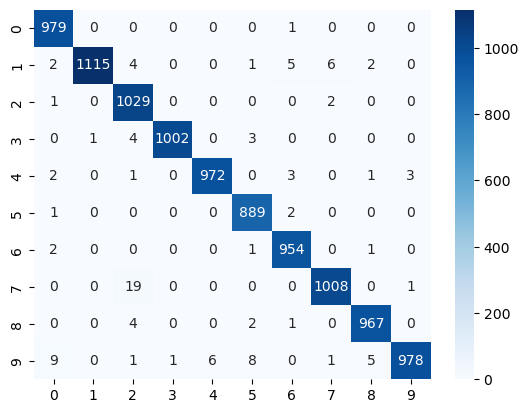

In [168]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()